# Loading the Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('data\heart_2020_cleaned.csv')

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [12]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [13]:
df.shape

(319795, 18)

# Cleaning the Data

## Missing Values

In [14]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

The dataset doesn't have missing values

## Drop Column

In [15]:
df.drop('Race', axis=1, inplace=True)

## Encoding

In [16]:
categorical_data = []
for col in df.columns:
  if len(df[col].unique()) <= 35:
    categorical_data.append(col)
    print(col, sorted(df[col].unique()))

HeartDisease ['No', 'Yes']
Smoking ['No', 'Yes']
AlcoholDrinking ['No', 'Yes']
Stroke ['No', 'Yes']
PhysicalHealth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
MentalHealth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
DiffWalking ['No', 'Yes']
Sex ['Female', 'Male']
AgeCategory ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
Diabetic ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
PhysicalActivity ['No', 'Yes']
GenHealth ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']
SleepTime [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
Asthma ['No', 'Yes'

In [17]:
def potential_encoding(categorical_data):
  encoding = {}
  for col in categorical_data:
    mapping = { k : i for i,k in enumerate(sorted(df[col].unique()))}
    encoding[col] = mapping
  return encoding

In [18]:
encoding = potential_encoding(categorical_data)
print(encoding)

{'HeartDisease': {'No': 0, 'Yes': 1}, 'Smoking': {'No': 0, 'Yes': 1}, 'AlcoholDrinking': {'No': 0, 'Yes': 1}, 'Stroke': {'No': 0, 'Yes': 1}, 'PhysicalHealth': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 17.0: 17, 18.0: 18, 19.0: 19, 20.0: 20, 21.0: 21, 22.0: 22, 23.0: 23, 24.0: 24, 25.0: 25, 26.0: 26, 27.0: 27, 28.0: 28, 29.0: 29, 30.0: 30}, 'MentalHealth': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 17.0: 17, 18.0: 18, 19.0: 19, 20.0: 20, 21.0: 21, 22.0: 22, 23.0: 23, 24.0: 24, 25.0: 25, 26.0: 26, 27.0: 27, 28.0: 28, 29.0: 29, 30.0: 30}, 'DiffWalking': {'No': 0, 'Yes': 1}, 'Sex': {'Female': 0, 'Male': 1}, 'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or old

In [19]:
#'GenHealth': {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}
encoding['GenHealth'] =  {'Excellent': 4, 'Fair': 1, 'Good': 2, 'Poor': 0, 'Very good': 3}
#more logical

In [20]:
for col, mapping in encoding.items():
  if df[col].dtype not in ['int64', 'float64']:
    df[col] = df[col].map(mapping)

In [21]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

# Visualization

In [ ]:
df.name = 'normal'
datasets = [df]

## Quick View of Distribution

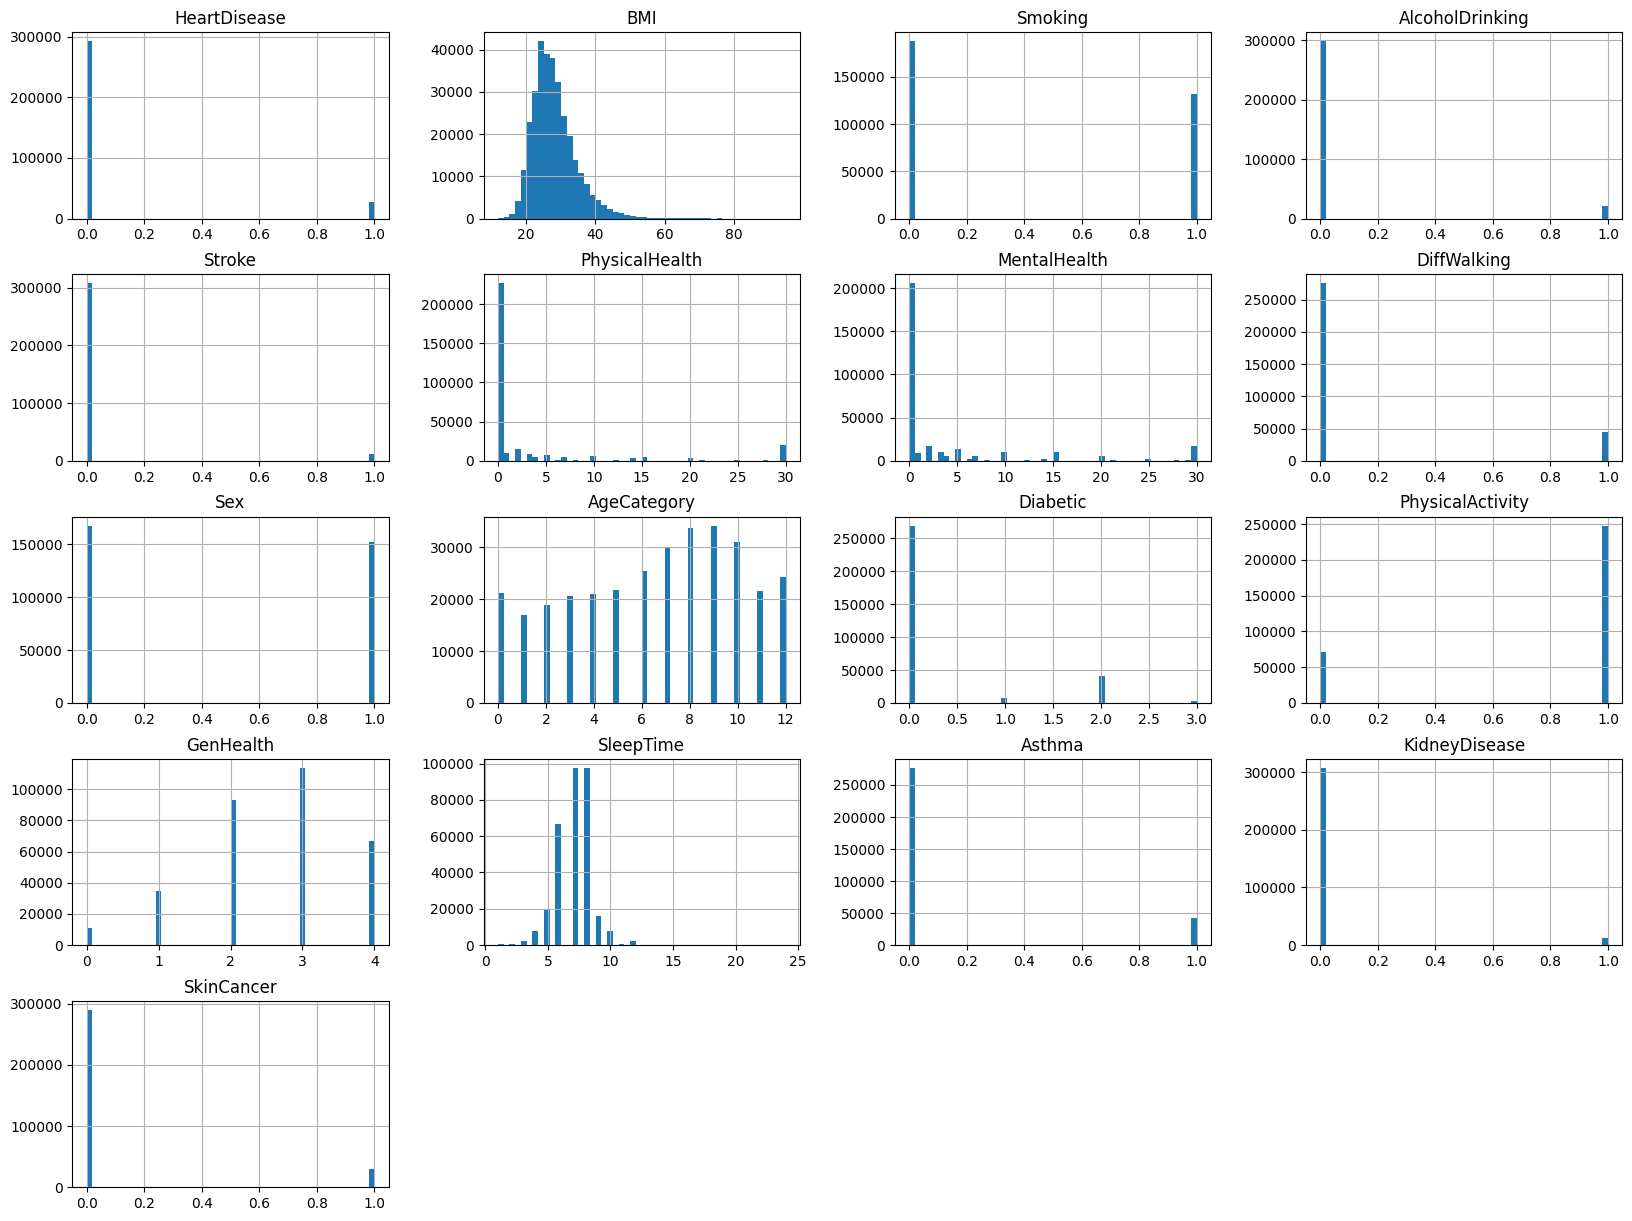

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df_cat = df.copy()
df_cat['MentalHealth'] = np.select([df['MentalHealth'] <= 5, (df['MentalHealth'] > 5) & (df['MentalHealth'] <= 14)], [0, 1], default=2)
df_cat['PhysicalHealth'] = np.select([df['PhysicalHealth'] <= 5, (df['PhysicalHealth'] > 5) & (df['PhysicalHealth'] <= 14)], [0, 1], default=2)

In [ ]:
df_cat.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,2,0,0,7,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,2,2,0,1,9,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,2,0,1,0,4,0,1,3,8.0,0,0,0


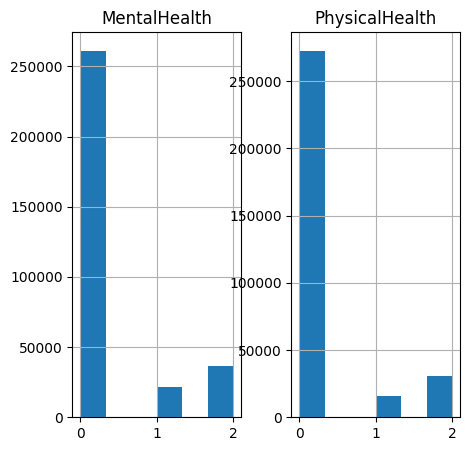

In [ ]:
df_cat[['MentalHealth','PhysicalHealth']].hist(bins=6, figsize=(5,5))
plt.show()

In [ ]:
df_cat.name = 'categorized mental & physical health'
datasets.append(df_cat)

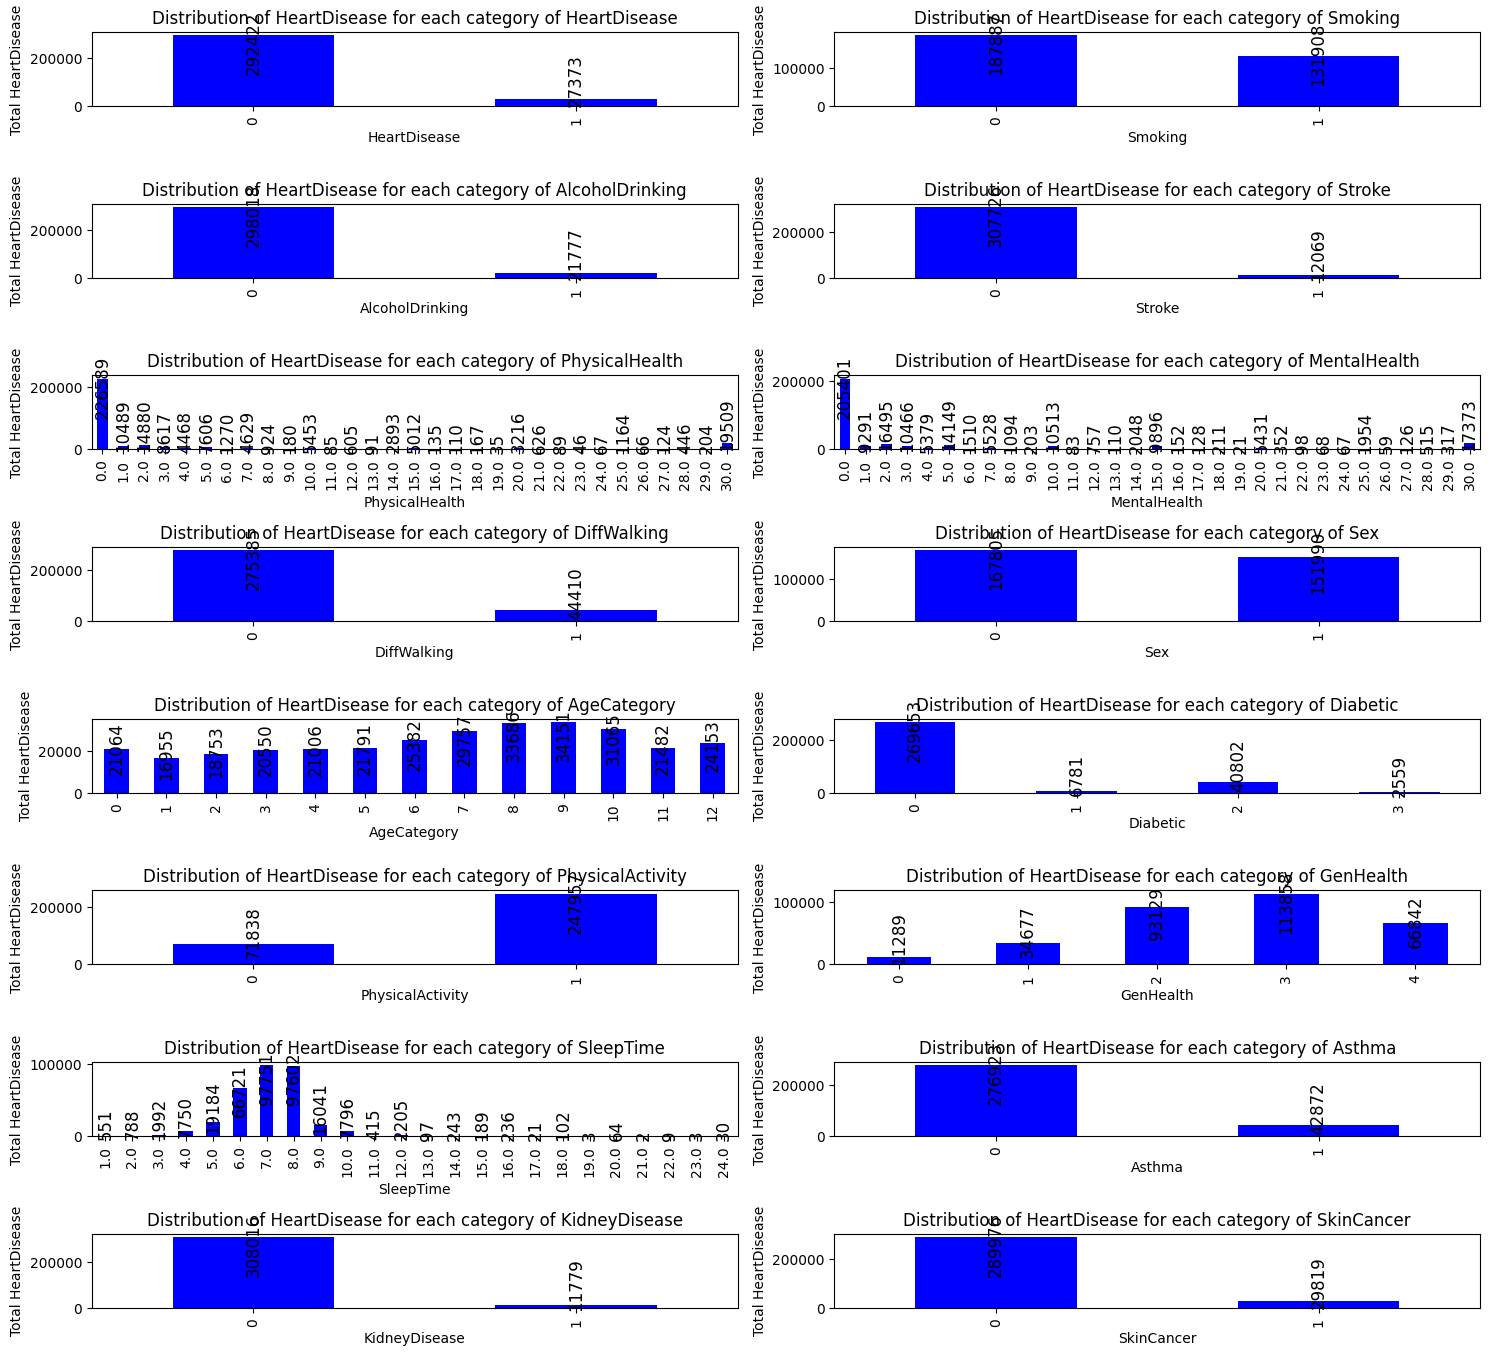

In [ ]:
fig = plt.figure(figsize = (15,15))
for i, col in enumerate(categorical_data) :
  plt.subplot(len(categorical_data)//2+1, 2,i+1)
  df.groupby(col)['HeartDisease'].count().plot(kind='bar',color="blue")
  ax = fig.gca()
  plt.ylabel('Total HeartDisease')
  plt.tight_layout()
  #show total rented bike for each hist
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()/2),ha='center',size= 12, rotation=90)
      plt.tight_layout()
  plt.title('Distribution of HeartDisease for each category of ' + col)

## Correlation

<Axes: >

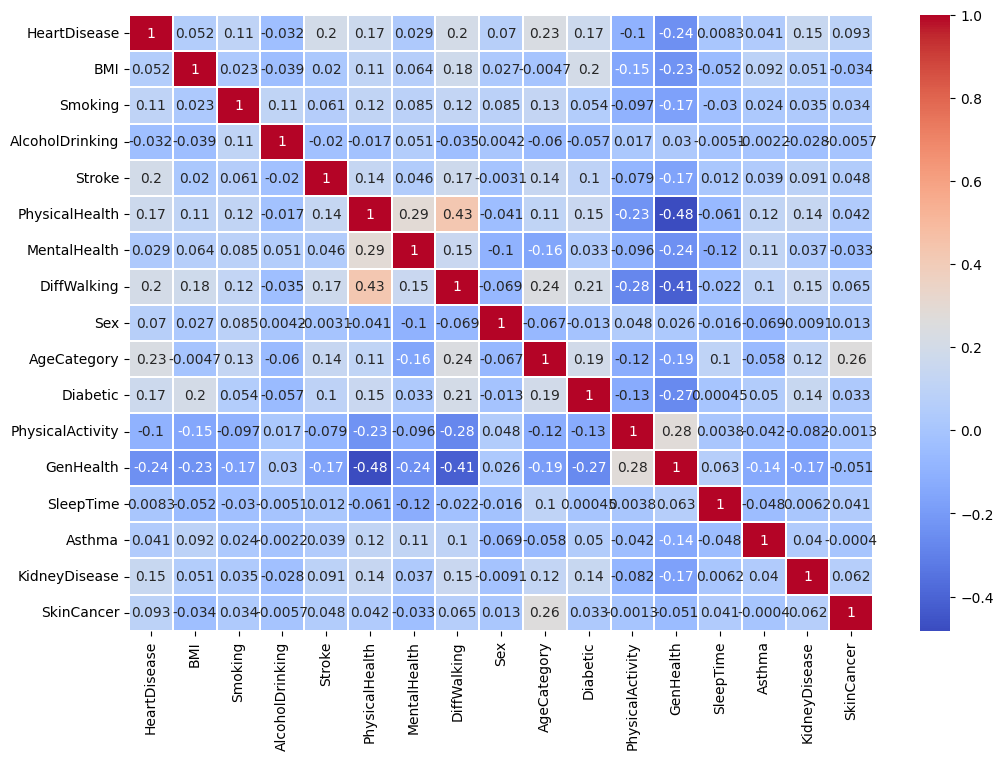

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [ ]:
abs(corr['HeartDisease']).sort_values()

SleepTime           0.008327
MentalHealth        0.028591
AlcoholDrinking     0.032080
Asthma              0.041444
BMI                 0.051803
Sex                 0.070040
SkinCancer          0.093317
PhysicalActivity    0.100030
Smoking             0.107764
KidneyDisease       0.145197
Diabetic            0.168553
PhysicalHealth      0.170721
Stroke              0.196835
DiffWalking         0.201258
AgeCategory         0.233432
GenHealth           0.243182
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

In [ ]:
#drop SleepTime, bad correlation with HeartDisease
df_bad_corr = df.drop('SleepTime', axis=1).copy()
df_bad_corr.name = 'without SleepTime'
datasets.append(df_bad_corr)

In [ ]:
#drop SleepTime, bad correlation with HeartDisease for df_cat
df_bad_corr_cat = df_cat.drop('SleepTime', axis=1).copy()
df_bad_corr_cat.name = 'categorized without SleepTime'
datasets.append(df_bad_corr_cat)

### To much correlate:
GenHealt : PhysicalHealth => -0.48

GenHealt : DiffWalking => -0.41

DiffWalking : PhysicalHealth => 0.43
### Medium correlate
MentalHealth : PhysicalHealth => 0.29

GenHealt : PhysicalActivity => 0.28

GenHealt has a better correlation with HeartDisease, so we dropped the others

In [ ]:
df_corr = df.drop(['DiffWalking', 'PhysicalHealth'], axis=1).copy()
df_corr.name = "without 'DiffWalking', 'PhysicalHealth'"

<Axes: >

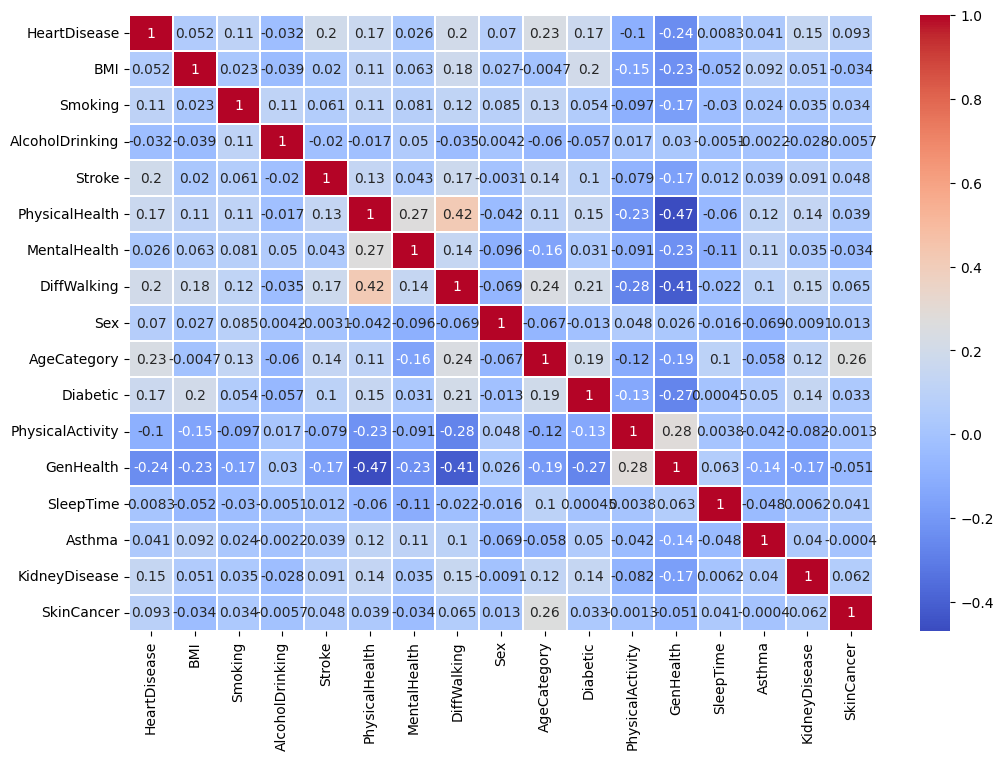

In [ ]:
corr = df_cat.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [ ]:
abs(corr['HeartDisease']).sort_values()

SleepTime           0.008327
MentalHealth        0.026439
AlcoholDrinking     0.032080
Asthma              0.041444
BMI                 0.051803
Sex                 0.070040
SkinCancer          0.093317
PhysicalActivity    0.100030
Smoking             0.107764
KidneyDisease       0.145197
PhysicalHealth      0.165833
Diabetic            0.168553
Stroke              0.196835
DiffWalking         0.201258
AgeCategory         0.233432
GenHealth           0.243182
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

In [ ]:
df_cat_corr = df_cat.drop(['DiffWalking', 'PhysicalHealth'], axis=1).copy()
df_cat_corr.name = "categorized without 'DiffWalking', 'PhysicalHealth'"

In [ ]:
datasets.append(df_corr)
datasets.append(df_cat_corr)

# Normalization

In [ ]:
continuous_data = []
for col in df.columns:
  if len(df[col].unique()) > 35:
    continuous_data.append(col)
continuous_data

['BMI']

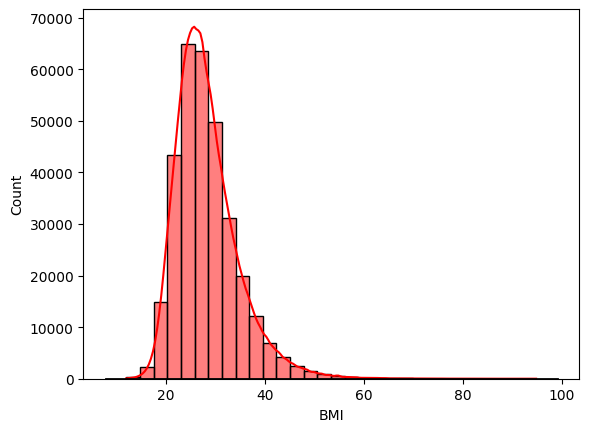

In [ ]:
from scipy.stats import norm
data = df["BMI"]
# Plot the histogram with KDE
sns.histplot(data, kde=True, color='red', bins=30)
# Overlay the normal distribution
mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [ ]:
def plot_normalize_method(col):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    data = df[col]
    # Original data
    sns.histplot(data, ax=axes[0], color='blue').set_title('Normal Data')
    # Log-transformed data
    sns.histplot(np.log1p(data + 0.0000001), ax=axes[1], color='red').set_title("log1p")
    # Square root-transformed data
    sns.histplot(np.sqrt(data), ax=axes[2], color='green').set_title("Square root")
    # Cube root-transformed data
    sns.histplot(np.cbrt(data * 2), ax=axes[3], color='purple').set_title("Cube root")
    plt.show()

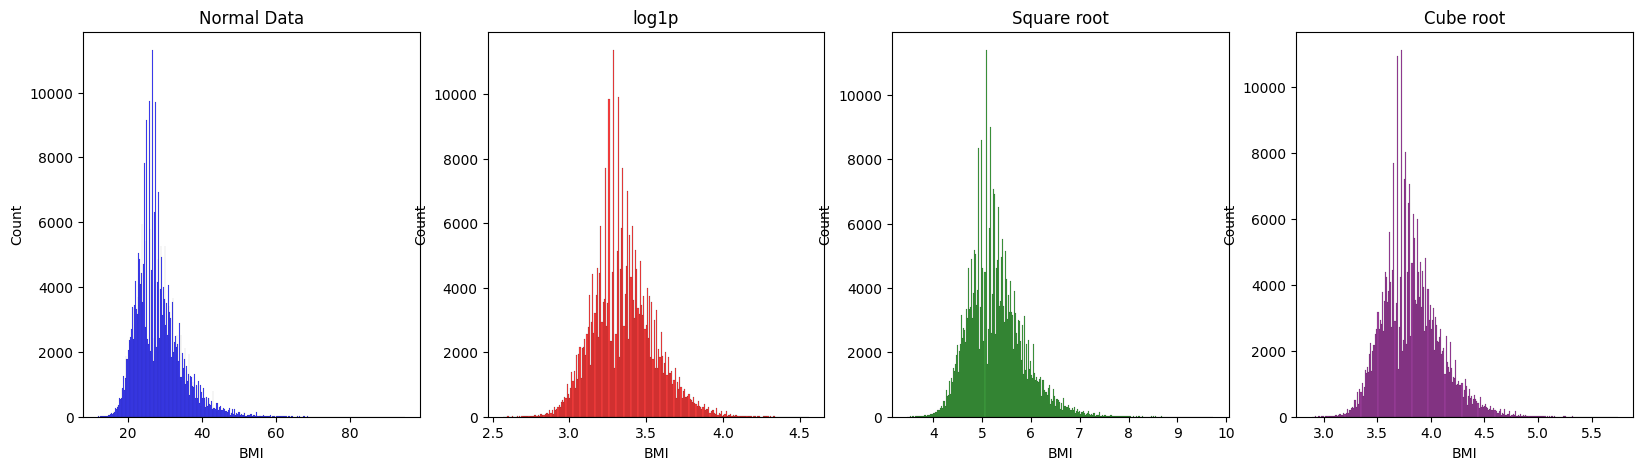

In [ ]:
plot_normalize_method('BMI')

In [ ]:
df_norm = df.copy()
df_norm['BMI'] = np.log1p(df_norm['BMI'] + 0.0000001)
df_norm.name = 'BMI normalized'
datasets.append(df_norm)

# First Prediction & Comparaison of Models

# Functions To Make Comparaison

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from IPython.display import clear_output
from IPython.display import display, HTML

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
def customPipeline(model, scaler):
  return Pipeline(steps=[
          ('scale', scaler),
          ('model', model)
      ])

In [ ]:
def modelEvaluation(dataset, model, test_size, scaler):
  X = dataset.drop('HeartDisease', axis=1).copy()
  Y = dataset['HeartDisease'].copy()
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,  random_state=42, stratify=Y)
  #create my custom pipeline
  pipe = customPipeline(model, scaler)
  #fit data
  pipe.fit(x_train, y_train)
  #predict
  y_pred = pipe.predict(x_test)
  #get some information
  acc = round(accuracy_score(y_test, y_pred)*100,3)
  #false negative
  cm = confusion_matrix(y_test, y_pred)
  normalized_cm = cm / cm.sum(axis=1, keepdims=True)
  false_negative = normalized_cm[1,0]
  return pipe, y_pred, acc, false_negative

In [ ]:
def compareModel(datasets, models, test_sizes, scalers):
    dataset_names = []
    models_array = []
    scalers_array = []
    test_sizes_array = []
    acc_array = []
    false_negatives = []

    i = 0
    total_iter = len(datasets)*len(scalers)*len(models)*len(test_sizes)

    for dataset in datasets:
      for m in models:
        print(str(m).split('()')[0])
        for s in scalers:
          for tz in test_sizes:
            display(HTML(f'<h2>Current Iteration: {i + 1}/{total_iter}</h2>'))
            _, _,acc, false_negative = modelEvaluation(dataset,m,tz,s)
            dataset_names.append(dataset.name)
            models_array.append(str(m).split('()')[0])
            scalers_array.append(str(s).split('()')[0])
            test_sizes_array.append(tz)
            acc_array.append(acc)
            false_negatives.append(false_negative)
            clear_output(wait=True)
            i += 1

    return pd.DataFrame({
        'dataset' : dataset_names,
        'model' : models_array,
        'scaler' : scalers_array,
        'test_size' : test_sizes_array,
        'accuracy in (%)' : acc_array,
        'false negative' : false_negatives
    })

### Our grid parameters

In [ ]:
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Creating instances of classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LGBMClassifier(),
    ExtraTreesClassifier(),
]


In [ ]:
scalers = [None, MinMaxScaler()]
test_sizes = [0.1]

In [44]:
for dataset in datasets:
  print(dataset.name)

normal
categorized mental & physical health
without SleepTime
categorized without SleepTime
without 'DiffWalking', 'PhysicalHealth'
categorized without 'DiffWalking', 'PhysicalHealth'
BMI normalized


In [45]:
#df_compare = compareModel(datasets, models, test_sizes, scalers)

In [49]:
#df_compare.sort_values(by='accuracy in (%)', ascending=False).head(15)

,dataset,model,scaler,test_size,accuracy in (%),false negative
51,"categorized without 'DiffWalking', 'PhysicalHe...",LogisticRegression,MinMaxScaler,0.1,91.732,0.888199
41,"without 'DiffWalking', 'PhysicalHealth'",LogisticRegression,MinMaxScaler,0.1,91.732,0.888564
26,without SleepTime,LGBMClassifier,None,0.1,91.726,0.907198
27,without SleepTime,LGBMClassifier,MinMaxScaler,0.1,91.726,0.907198
67,BMI normalized,LGBMClassifier,MinMaxScaler,0.1,91.707,0.909390
66,BMI normalized,LGBMClassifier,None,0.1,91.707,0.909390
6,normal,LGBMClassifier,None,0.1,91.707,0.909390
7,normal,LGBMClassifier,MinMaxScaler,0.1,91.707,0.909390
40,"without 'DiffWalking', 'PhysicalHealth'",LogisticRegression,None,0.1,91.704,0.888564
11,categorized mental & physical health,LogisticRegression,MinMaxScaler,0.1,91.704,0.886007


In [48]:
#df_compare.sort_values(by='false negative').head(15)

,dataset,model,scaler,test_size,accuracy in (%),false negative
63,BMI normalized,DecisionTreeClassifier,MinMaxScaler,0.1,86.348,0.736573
2,normal,DecisionTreeClassifier,None,0.1,86.351,0.739130
13,categorized mental & physical health,DecisionTreeClassifier,MinMaxScaler,0.1,86.804,0.740957
62,BMI normalized,DecisionTreeClassifier,None,0.1,86.241,0.742053
3,normal,DecisionTreeClassifier,MinMaxScaler,0.1,86.413,0.742784
12,categorized mental & physical health,DecisionTreeClassifier,None,0.1,86.751,0.747168
43,"without 'DiffWalking', 'PhysicalHealth'",DecisionTreeClassifier,MinMaxScaler,0.1,86.710,0.750091
42,"without 'DiffWalking', 'PhysicalHealth'",DecisionTreeClassifier,None,0.1,86.692,0.750822
32,categorized without SleepTime,DecisionTreeClassifier,None,0.1,87.699,0.751187
33,categorized without SleepTime,DecisionTreeClassifier,MinMaxScaler,0.1,87.539,0.754476


# Modeling

### LGBM Classifier

In [1]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#### grid search

In [24]:
X,y = df.drop('HeartDisease', axis=1).copy(), df['HeartDisease'].copy()

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

In [25]:
lgbm = lgb.LGBMClassifier()
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 27373, number of negative: 292422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 319795, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085595 -> initscore=-2.368641
[LightGBM] [Info] Start training from score -2.368641


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50, 100]},
             scoring='accuracy', verbose=1)

In [26]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 50}
Best accuracy found:  0.9159742960333963


#### model training

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
lgbm = lgb.LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=500, num_leaves=50)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 24636, number of negative: 263179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 287815, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085597 -> initscore=-2.368626
[LightGBM] [Info] Start training from score -2.368626


LGBMClassifier(max_depth=10, n_estimators=500, num_leaves=50)

#### models metrics

In [32]:
lgbm_pred = lgbm.predict(X_test)
print("accuracy:",accuracy_score(y_test, lgbm_pred))

accuracy: 0.916260162601626


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lgbm_pred)
normalized_cm1 = cm / cm.sum(axis=1, keepdims=True)
print(normalized_cm1)

[[0.99230585 0.00769415]
 [0.89623676 0.10376324]]


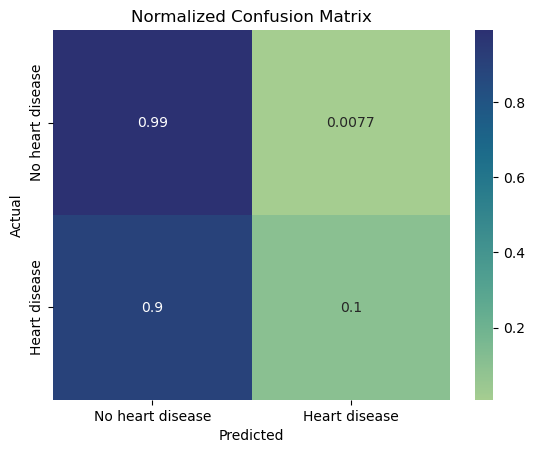

In [31]:
#create a heatmap of the normalized confusion matrix
sns.heatmap(normalized_cm1, annot=True, cmap='crest')
#add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
class_labels = ['No heart disease', 'Heart disease']
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)

plt.show()

### Neural network

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=16))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(),'accuracy'])


In [34]:
tf.config.list_physical_devices('GPU')

[]

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1).copy()
Y = df['HeartDisease'].copy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,  random_state=42,stratify=Y)

model.fit(x_train, y_train, epochs=10, batch_size=32, class_weight={0: 1., 1: 3.})


Epoch 1/10


8995/8995 [==============================] - 26s 3ms/step - loss: 0.4717 - recall: 0.3824 - accuracy: 0.8842
Epoch 2/10
8995/8995 [==============================] - 27s 3ms/step - loss: 0.4602 - recall: 0.3852 - accuracy: 0.8892
Epoch 3/10
8995/8995 [==============================] - 25s 3ms/step - loss: 0.4577 - recall: 0.3933 - accuracy: 0.8893
Epoch 4/10
8995/8995 [==============================] - 24s 3ms/step - loss: 0.4560 - recall: 0.3858 - accuracy: 0.8904
Epoch 5/10
8995/8995 [==============================] - 25s 3ms/step - loss: 0.4553 - recall: 0.3908 - accuracy: 0.8901
Epoch 6/10
8995/8995 [==============================] - 25s 3ms/step - loss: 0.4551 - recall: 0.3901 - accuracy: 0.8901
Epoch 7/10
8995/8995 [==============================] - 24s 3ms/step - loss: 0.4543 - recall: 0.3968 - accuracy: 0.8897
Epoch 8/10
8995/8995 [==============================] - 22s 2ms/step - loss: 0.4538 - recall: 0.3979 - accuracy: 0.8892
Epoch 9/10
8995/8995 [================

In [36]:
y_pred=model.predict(x_test)

1000/1000 [==============================] - 1s 1ms/step


In [37]:
y_pred = np.round(y_pred).astype(int)

In [43]:
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.8977798624140088


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
normalized_cm1 = cm / cm.sum(axis=1, keepdims=True)
print(normalized_cm1)
print()

[[0.95096262 0.04903738]
 [0.67044209 0.32955791]]



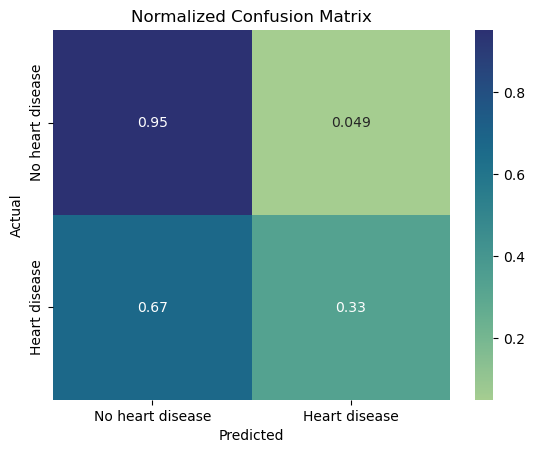

In [42]:
#create a heatmap of the normalized confusion matrix
sns.heatmap(normalized_cm1, annot=True, cmap='crest')
#add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
class_labels = ['No heart disease', 'Heart disease']
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)

plt.show()